In [1]:
#載入Cifar10資料
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [3]:
#Keras提供cifar.load_data()，可以下載或讀取cufar10資料
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [6]:
#查看cifar10資料
print('train:',len(x_img_train))
print('test:',len(x_img_test))

train: 50000
test: 10000


In [7]:
#image的shape形狀
x_img_train.shape #第1維度:筆數 第2、3維度:影像大小 第4維度:RGB三元設所以是3

(50000, 32, 32, 3)

In [8]:
#第0筆的影像內容
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [9]:
#y_label_train的shape形狀
y_label_train.shape

(50000, 1)

In [10]:
#定義label_dict字典
label_dict ={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [11]:
#修改plot_images_labels_prediction
#使用label_dict字典，將label與prediction的0~9數字轉換維圖形的類別名稱。
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #數字影像,真實質,預測結果,開始的顯示資料index,要顯示的資料數
    fig = plt.gcf()            #圖形大小
    fig.set_size_inches(12,14) #圖形大小
    if num > 25 : num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)#建立subgraph子圖形5行5列
        ax.imshow(images[idx],cmap='binary')#劃出subgraph子圖形
       
        title = str(i)+','+label_dict[labels[i][0]]
        if len(prediction) > 0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10)   #設定title大小
        ax.set_xticks([]);ax.set_yticks([]) #設定不顯示刻度
        idx+=1
    plt.show()

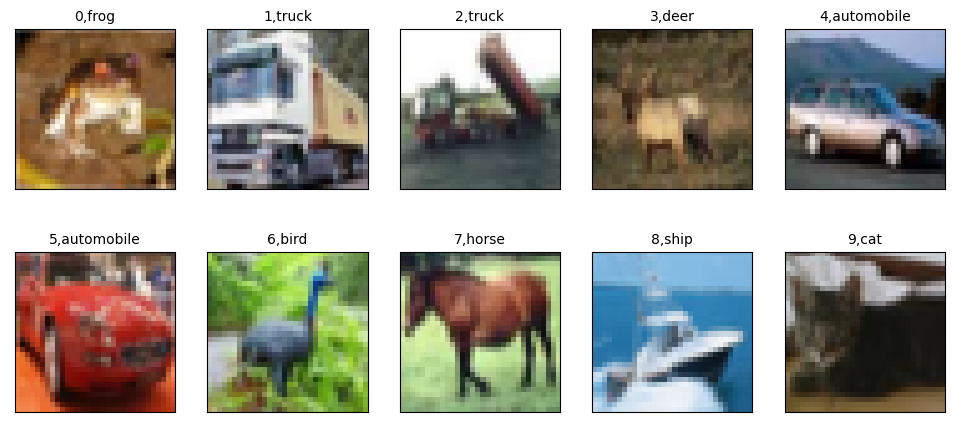

In [12]:
#查看訓練資料前10筆資料
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [13]:
#查看訓練資料第1個影像第1個點
x_img_train[0][0][0] #每個點有三個數字，分別代表RGB

array([59, 62, 63], dtype=uint8)

In [14]:
#將照片影像image的數字標準
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

In [15]:
#查看標準化的結果
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [16]:
#將label進行資料處理
#查看label的原本的shape形狀
y_label_train.shape

(50000, 1)

In [17]:
#查看前五筆資料
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
#將label標籤來為轉換維Onehot encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_test_train_OneHot = np_utils.to_categorical(y_label_test)

In [19]:
#OneHot轉換之後的標籤欄位
y_label_train_OneHot.shape #以下的執行結果，每一筆是10個0或1組合

(50000, 10)

In [20]:
y_label_train_OneHot[:5]
#如下執行結果，例如：第1筆資料，原來的真實値是6也就是 frog，執行 One-hotencoding 轉換後，變成0或1的組合，
#只有第6個數字（由0算起）是1，其餘都是0。

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)